In [0]:
import sys
print(sys.version)

3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]


In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten

Using TensorFlow backend.


In [0]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
# One hot encoding
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# Build the model
model = Sequential()
# 28*28*1
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=1,padding='same',activation='relu'))#,input_shape=(28,28,1))) # kernel_size tells the window size(filter size)
# 28*28*64
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
# 14*14*64
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
# 14*14*64
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.25))
# 7*7*64
model.add(Flatten())
# 3036*1024
model.add(Dense(units=1024,activation='relu'))
model.add(Dropout(0.25))
# 1024*10
model.add(Dense(units=10,activation='softmax'))

In [0]:
# Train the model
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# Fit the model
model.fit(x_train,y_train,epochs=1,validation_data=(x_test,y_test))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 258s 4ms/step - loss: 0.1230 - acc: 0.9605 - val_loss: 0.0439 - val_acc: 0.9860


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              3212288   
__________

In [0]:
model.save('/content/drive/My Drive/mnist_model_keras_collab.h5')

In [0]:
from keras.models import load_model
new_model = load_model('/content/drive/My Drive/mnist_model_keras_collab.h5')

In [0]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              3212288   
__________

AxesImage(72,49.5;446.4x298.98)


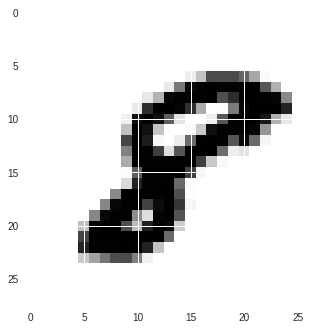

In [0]:
import matplotlib.pyplot as plt
print(plt.imshow(x_train[913].reshape(28,28)))

In [0]:
from keras.preprocessing import image
img = image.load_img(path='/content/drive/My Drive/number.png',color_mode="grayscale",target_size=(28,28,1))
img = image.img_to_array(img)

In [0]:
# Inference 

In [0]:
output = new_model.predict(img.reshape(1,28,28,1)) # To do it for a new data point

In [0]:
output.argmax()

4

In [0]:
# Sum Up

In [0]:
from keras.models import load_model
from keras.preprocessing import image
new_model = load_model('mnist_model_keras_collab.h5')
img = image.load_img(path='number.png',color_mode="grayscale",target_size=(28,28,1))
img = image.img_to_array(img)
output = new_model.predict(img.reshape(1,28,28,1)) # To do it for a new data point
output.argmax()

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import sys
from keras.models import load_model
from keras.preprocessing import image

def predict():
    print("Process started")
    new_model = load_model('/content/drive/My Drive/mnist_model_keras_collab.h5')
    print('model_loaded')
    img = image.load_img(path='/content/drive/My Drive/number.png',color_mode="grayscale",target_size=(28,28,1))
    print('image_loaded')
    img = image.img_to_array(img)
    print('running_inference')
    output = new_model.predict(img.reshape(1,28,28,1)) # To do it for a new data point
    print('Got the result !')
    print(output.argmax())
   
if __name__ == "__main__":
    predict()

Process started
model_loaded
image_loaded
running_inference
Got the result !
4


In [0]:
print(load_model('/content/drive/My Drive/mnist_model_keras_collab.h5'))